In [1]:
import numpy as np 
import sciann as sn 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.io

import pandas as pd

import h5py

---------------------- SCIANN 0.6.0.4 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 



In [2]:
path = "NoCracK/config_file/Event0000/output.h5"

hf = h5py.File(path, 'r')

In [3]:
hf.keys()

<KeysViewHDF5 ['connectivity_ACOUSTIC', 'coordinates_ACOUSTIC', 'partitioning', 'volume']>

In [4]:
selected_ts = 70

loc = np.array(hf['coordinates_ACOUSTIC']).reshape(np.array(hf['coordinates_ACOUSTIC']).shape[0]*np.array(hf['coordinates_ACOUSTIC']).shape[1],2)

df = pd.DataFrame(loc,columns={'X','Y'})
df['X'] = np.round(df['X'],5)
df['Y'] = np.round(df['Y'],5)

values = np.array(hf['volume']['phi'])[selected_ts,:,:,:25].reshape(2500*25)

df['PHI'] = values

df_clean = df.pivot_table(values='PHI',index='Y',columns='X')
df_clean.sort_index(axis=0,ascending=False,inplace=True)

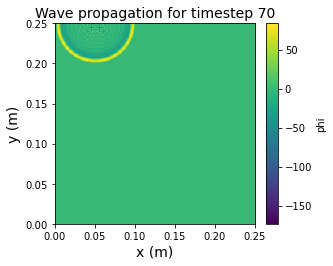

In [6]:
plt.figure(figsize=(4,4))

ax = plt.gca()
im = ax.imshow(df_clean.values,extent=[0, 0.25, 0, 0.25])

plt.xlabel('x (m)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('y (m)', fontsize=14)
plt.yticks(fontsize=10)

plt.title(f'Wave propagation for timestep {selected_ts}', fontsize=14)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)
cbar.set_label('phi',size=10)

In [17]:
X = np.array(hf['coordinates_ACOUSTIC']).reshape(np.array(hf['coordinates_ACOUSTIC']).shape[0]*np.array(hf['coordinates_ACOUSTIC']).shape[1],2)[:,0]
Y = np.array(hf['coordinates_ACOUSTIC']).reshape(np.array(hf['coordinates_ACOUSTIC']).shape[0]*np.array(hf['coordinates_ACOUSTIC']).shape[1],2)[:,1]

In [18]:
sx = 0.05
sy = 0.25

norm = np.sqrt((sx - X)**2 + (sy - Y)**2)

In [20]:
columns = ['X','Y','norm']

df = pd.DataFrame(columns=columns)

for _i, param in enumerate([X,Y,norm]):
    df[columns[_i]] = param # we select the timestep here (param[:,timestep])

df['X'] = np.round(df['X'],5)
df['Y'] = np.round(df['Y'],5)

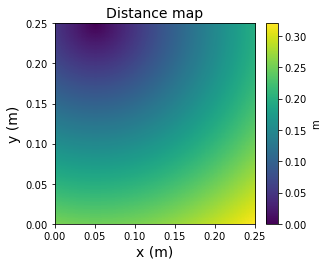

In [21]:
df_clean = df.pivot_table(values='norm',index='Y',columns='X')
df_clean.sort_index(axis=0,ascending=False,inplace=True)

plt.figure(figsize=(4,4))

ax = plt.gca()
im = ax.imshow(df_clean.values,extent=[0, 0.25, 0, 0.25])

plt.xlabel('x (m)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('y (m)', fontsize=14)
plt.yticks(fontsize=10)

plt.title('Distance map', fontsize=14)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)
cbar.set_label('m',size=10)

In [149]:
# Pick random values

# 1. Create random time vector
max_ts=101
num_data=5000

vp = 1400

time = np.linspace(0,(max_ts-1)*0.0000005,max_ts) # time

random_ts = np.random.choice(np.arange(0,max_ts),num_data,replace=True) # timesteps
distance = time[random_ts]*vp # distances associated to the timesteps

In [154]:
loc = hf['coordinates_ACOUSTIC'][:].reshape(np.array(hf['coordinates_ACOUSTIC']).shape[0]*np.array(hf['coordinates_ACOUSTIC']).shape[1],2)

df = pd.DataFrame(loc,columns={'X','Y'})
df['X'] = np.round(df['X'],5)
df['Y'] = np.round(df['Y'],5)

df['norm'] = norm

values = hf['volume']['phi'][random_ts[0],:,:,:25].reshape(2500*25)
df['PHI'] = values

df = df[df['norm'] <= 1.1*distance[0]]

df_clean = df.pivot_table(values='PHI',index='Y',columns='X')
df_clean.sort_index(axis=0,ascending=False,inplace=True)

# Pick a random value that is inside the distance travelled by the wave
picked_values = df.iloc[np.random.choice(np.where(df['norm'] <= 1.1*distance[0])[0])]

print('X',picked_values['X'])
print('Y',picked_values['Y'])
print('PHI',picked_values['PHI'])

X 0.05914
Y 0.23
PHI -12.50468635559082


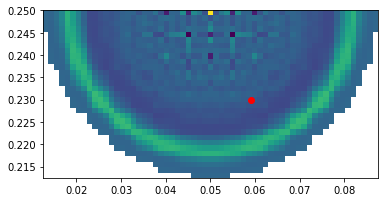

In [155]:
plt.imshow(df_clean.values,extent=[df_clean.columns[0],df_clean.columns[-1],df_clean.index[-1],df_clean.index[0]])
plt.scatter(picked_values['X'],picked_values['Y'],c='r')

In [156]:
x_picked = []
y_picked = []
phi_picked = []

loc = hf['coordinates_ACOUSTIC'][:].reshape(np.array(hf['coordinates_ACOUSTIC']).shape[0]*np.array(hf['coordinates_ACOUSTIC']).shape[1],2)

df = pd.DataFrame(loc,columns={'X','Y'})
df['X'] = np.round(df['X'],5)
df['Y'] = np.round(df['Y'],5)

df['norm'] = norm

for _i, ts in enumerate(random_ts):
    values = hf['volume']['phi'][ts,:,:,:25].reshape(2500*25)

    df['PHI'] = values

    picked_values = df.iloc[np.random.choice(np.where(df['norm'] <= 1.1*distance[_i])[0])]

    x = picked_values['X']
    y = picked_values['Y']
    phi = picked_values['PHI']

    x_picked.append(x)
    y_picked.append(y)
    phi_picked.append(phi)

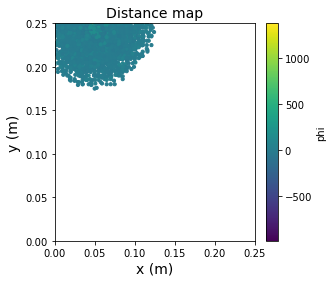

In [157]:
plt.figure(figsize=(4,4))

ax = plt.gca()
im = ax.scatter(x_picked,y_picked,c=phi_picked,s=10)

ax.set_xlim(0,0.25)
ax.set_ylim(0,0.25)

plt.xlabel('x (m)', fontsize=14)
plt.xticks(fontsize=10)

plt.ylabel('y (m)', fontsize=14)
plt.yticks(fontsize=10)

plt.title('Distance map', fontsize=14)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="6%", pad=0.15)

cbar = plt.colorbar(im, cax=cax)
cbar.set_label('phi',size=10)

In [333]:
def PrepareData(hf,max_ts=201,num_data=5000,random=True):

    X = hf['coordinates_ACOUSTIC'][:].reshape(hf['coordinates_ACOUSTIC'][:].shape[0]*hf['coordinates_ACOUSTIC'][:].shape[1],2)[:,0]
    Y = hf['coordinates_ACOUSTIC'][:].reshape(hf['coordinates_ACOUSTIC'][:].shape[0]*hf['coordinates_ACOUSTIC'][:].shape[1],2)[:,1]

    XX = np.tile(X.reshape(X.shape[0],1),max_ts)
    YY = np.tile(Y.reshape(Y.shape[0],1),max_ts)

    XX = np.round(XX,5)
    YY = np.round(YY,5)

    time = np.linspace(0,(max_ts-1)*0.0000005,max_ts) # Create an array to select data only for a maximum time 
    TT = np.tile(time.reshape(time.shape[0],1),XX.shape[0]).T

    PHI = hf['volume']['phi'][:max_ts,:,:,:hf['coordinates_ACOUSTIC'][:].shape[1]].reshape(max_ts,2500*25).T

    N = X.shape[0]
    T = time.shape[0]

    if random:
        idx = np.random.choice(N*T, num_data, replace=False)
    else:
        idx = np.arange(0, N*T)
    
    x_train = XX.flatten()[idx,None] # NT x 1
    y_train = YY.flatten()[idx,None] # NT x 1
    t_train = TT.flatten()[idx,None] # NT x 1
    
    phi_train = PHI.flatten()[idx,None] # NT x 1

    return (x_train, y_train, t_train, phi_train)

In [334]:
x_train, y_train, t_train, p_train = PrepareData(hf,max_ts=1,num_data=5000,random=True)

(array([   0.,    0.,    0.,    0.,    0., 5000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5],
       dtype=float32),
 <BarContainer object of 10 artists>)

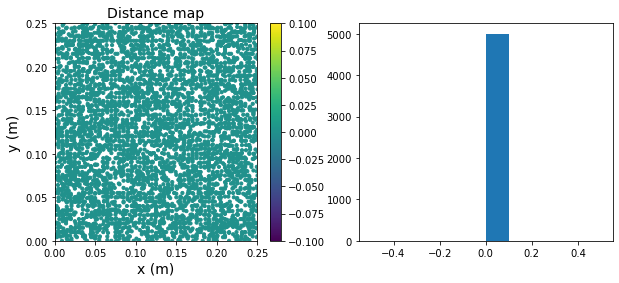

In [336]:
fig, axs = plt.subplots(ncols=2,figsize=(10,4))

fig.colorbar(axs[0].scatter(x_train,y_train,c=p_train,s=10), ax=axs[0])

axs[0].set_xlim(0,0.25)
axs[0].set_ylim(0,0.25)

axs[0].set_xlabel('x (m)', fontsize=14)
axs[0].set_ylabel('y (m)', fontsize=14)

axs[0].tick_params(labelsize=10)
axs[0].set_title('Distance map', fontsize=14)

axs[1].hist(p_train)

In [286]:
def PrepareData_Custom(hf,max_ts=200,num_data=5000,random=True):

    np.random.seed(0)
    loc = hf['coordinates_ACOUSTIC'][:].reshape(hf['coordinates_ACOUSTIC'][:].shape[0]*hf['coordinates_ACOUSTIC'][:].shape[1],2)

    X = loc[:,0]
    Y = loc[:,1]

    sx = 0.05
    sy = 0.25
    vp = 1400

    norm = np.sqrt((sx - X)**2 + (sy - Y)**2)

    time = np.linspace(0,(max_ts-1)*0.0000005,max_ts) # time
    random_ts = np.random.choice(np.arange(0,max_ts),num_data,replace=True) # timesteps

    t_train = time[random_ts]
    distance = time[random_ts]*vp # distances associated to the timesteps

    x_picked = []
    y_picked = []
    phi_picked = []

    df = pd.DataFrame(loc,columns={'X','Y'})
    df['X'] = np.round(df['X'],5)
    df['Y'] = np.round(df['Y'],5)

    df['norm'] = norm

    for _i, ts in enumerate(random_ts):
        df['PHI'] = hf['volume']['phi'][ts,:,:,:25].reshape(2500*25)

        picked_values = df.iloc[np.random.choice(np.where(df['norm'] <= 1.1*distance[_i])[0])]

        x = picked_values['X']
        y = picked_values['Y']
        phi = picked_values['PHI']

        x_picked.append(x)
        y_picked.append(y)
        phi_picked.append(phi)

    return (np.array(x_picked).reshape(num_data,1), np.array(y_picked).reshape(num_data,1), t_train.reshape(num_data,1), np.array(phi_picked).reshape(num_data,1))

In [287]:
x_train, y_train, t_train, p_train = PrepareData_Custom(hf,max_ts=50,num_data=5000,random=True)

(array([8.000e+00, 9.000e+00, 3.000e+00, 4.990e+02, 3.785e+03, 4.230e+02,
        1.420e+02, 9.000e+00, 0.000e+00, 1.220e+02]),
 array([-986.18536377, -750.10232544, -514.01928711, -277.93624878,
         -41.85321045,  194.22982788,  430.31286621,  666.39590454,
         902.47894287, 1138.5619812 , 1374.64501953]),
 <BarContainer object of 10 artists>)

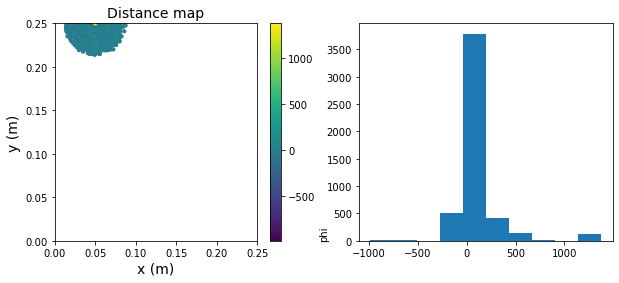

In [318]:
fig, axs = plt.subplots(ncols=2,figsize=(10,4))

cbar = fig.colorbar(axs[0].scatter(x_train,y_train,c=p_train,s=10), ax=axs[0])
cbar.set_label('phi',size=10,loc='bottom')
axs[0].set_xlim(0,0.25)
axs[0].set_ylim(0,0.25)

axs[0].set_xlabel('x (m)', fontsize=14)
axs[0].set_ylabel('y (m)', fontsize=14)

axs[0].tick_params(labelsize=10)
axs[0].set_title('Distance map', fontsize=14)

axs[1].hist(p_train)

In [289]:
x = sn.Variable("x", dtype='float64')
y = sn.Variable("y", dtype='float64')
t = sn.Variable("t", dtype='float64')

In [290]:
p = sn.Functional("P", [x, y, t], 8*[20], 'tanh')

In [291]:
lambda1 = sn.Parameter(np.random.rand(), inputs=[x,y,t], name="lambda1")

In [292]:
p_xx = sn.diff(p, x, order=2)
p_yy = sn.diff(p, y, order=2)
p_tt = sn.diff(p, t, order=2)

# Define constraints 
d1 = sn.Data(p)

c1 = sn.Tie(p_tt, (lambda1 ** 2) * (p_xx + p_yy))

In [293]:
# Define the optimization model (set of inputs and constraints)
model = sn.SciModel(
    inputs=[x, y, t],
    targets=[d1, c1],
    loss_func="mse"
)

In [294]:
input_data = [x_train, y_train, t_train]

In [295]:
data_d1 = p_train
data_c1 = 'zeros'

target_data = [data_d1, data_c1]

In [296]:
history = model.train(
    x_true=input_data,
    y_true=target_data,
    epochs=1000,
    batch_size=100,
    shuffle=True,
    learning_rate=0.001,
    reduce_lr_after=100,
    stop_loss_value=1e-8,
    verbose=1
)

683 - sub_4_loss: 0.2220
Epoch 855/1000
5000/5000 [==============================] - 0s 70us/sample - loss: 58823.4221 - P_loss: 58823.1884 - sub_4_loss: 0.2337
Epoch 856/1000
5000/5000 [==============================] - 0s 61us/sample - loss: 58823.2987 - P_loss: 58823.0515 - sub_4_loss: 0.2472
Epoch 857/1000
5000/5000 [==============================] - 0s 59us/sample - loss: 58823.0663 - P_loss: 58822.8068 - sub_4_loss: 0.2596
Epoch 858/1000
5000/5000 [==============================] - 0s 60us/sample - loss: 58822.9112 - P_loss: 58822.6376 - sub_4_loss: 0.2736
Epoch 859/1000
5000/5000 [==============================] - 0s 60us/sample - loss: 58822.8313 - P_loss: 58822.5433 - sub_4_loss: 0.2880
Epoch 860/1000
5000/5000 [==============================] - 0s 59us/sample - loss: 58822.6695 - P_loss: 58822.3618 - sub_4_loss: 0.3077
Epoch 861/1000
5000/5000 [==============================] - 0s 62us/sample - loss: 58822.4252 - P_loss: 58822.0968 - sub_4_loss: 0.3284
Epoch 862/1000
5000/500

In [297]:
print("lambda1: {}".format(lambda1.value))

lambda1: [0.06692238]


In [298]:
# c = sqrt(C/rho)
np.sqrt(1400/1200)

1.0801234497346435

Text(0, 0.5, 'loss')

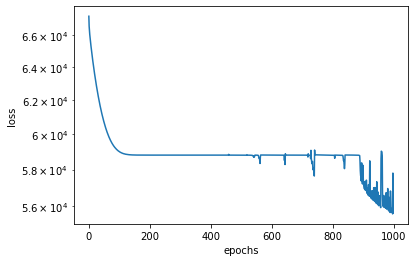

In [299]:
plt.semilogy(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [413]:
max_ts = 50

In [414]:
time = np.linspace(0,(max_ts-1)*0.0000005,max_ts)

In [322]:
x_test = X
y_test = Y
phi_test = hf['volume']['phi'][max_ts,:,:,:25].reshape(2500*25)
t_test = np.ones((y_test.shape[0],))*time[]

test_data = [x_test,y_test,t_test]

In [323]:
preds = model.predict(test_data)

In [326]:
columns = ['X','Y','PHI_preds','PHI_test']

df = pd.DataFrame(columns=columns)

for _i, param in enumerate([x_test,y_test,preds[1],phi_test]):
    df[columns[_i]] = param

df['X'] = np.round(df['X'],5)
df['Y'] = np.round(df['Y'],5)

Text(0.5, 1.0, 'True')

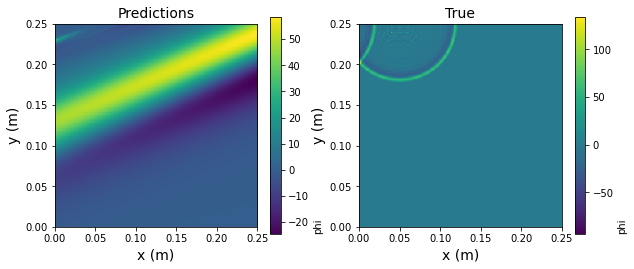

In [329]:
fig, axs = plt.subplots(ncols=2,figsize=(10,4))

df_clean = df.pivot_table(values='PHI_preds',columns='X',index='Y')
df_clean.sort_index(axis=0,ascending=False,inplace=True)

cbar = fig.colorbar(axs[0].imshow(df_clean.values,extent=[0, 0.25, 0, 0.25]), ax=axs[0])
cbar.set_label('phi',size=10,loc='bottom')

axs[0].set_xlabel('x (m)', fontsize=14)
axs[0].set_ylabel('y (m)', fontsize=14)

axs[0].tick_params(labelsize=10)
axs[0].set_title('Predictions', fontsize=14)

df_clean = df.pivot_table(values='PHI_test',columns='X',index='Y')
df_clean.sort_index(axis=0,ascending=False,inplace=True)

cbar = fig.colorbar(axs[1].imshow(df_clean.values,extent=[0, 0.25, 0, 0.25]), ax=axs[1])
cbar.set_label('phi',size=10,loc='bottom')

axs[1].set_xlabel('x (m)', fontsize=14)
axs[1].set_ylabel('y (m)', fontsize=14)

axs[1].tick_params(labelsize=10)
axs[1].set_title('True', fontsize=14)


In [437]:
columns = ['X','Y','PHI']

df = pd.DataFrame(columns=columns)

for _i, param in enumerate([x_test,y_test,phi_test]):
    df[columns[_i]] = param # we select the timestep here (param[:,timestep])

df['X'] = np.round(df['X'],5)
df['Y'] = np.round(df['Y'],5)

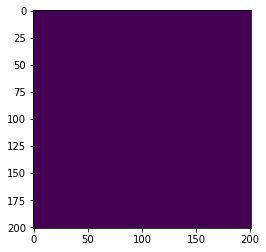

In [438]:
df_clean = df.pivot_table(values='PHI',columns='X',index='Y')
plt.imshow(df_clean.values)